### Cohort creation

We define the cohorts for mortality prediction and length of stay prediction, based on the first 24 hour of stay of the patients.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

establish connection to DB and define helper function for running queries

In [3]:
import pandas as pd
from proto.etl.config import SSHInfoEicu, DBInfoEicu
from proto.etl.utils import connect_to_db_via_ssh, run_eicu_query, get_column_completeness, load_schema_for_modelling

conn = connect_to_db_via_ssh(SSHInfoEicu, DBInfoEicu)
cursor = conn.cursor()
query_schema = 'set search_path to eicu_crd;'

In [4]:
query = """
select icu_los_hours, hosp_mort
from icustay_detail
"""
df = run_eicu_query(query, conn)

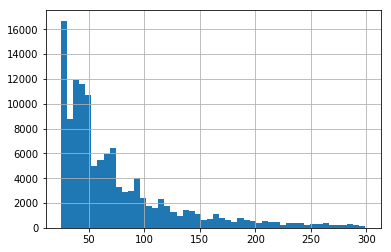

In [5]:

df[(df.icu_los_hours < 300) & (df.icu_los_hours > 24)].icu_los_hours.hist(bins=50)